<a href="https://colab.research.google.com/github/ikhwandio4/PCVK_Ganjil_2024/blob/main/Modul12_pcvk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama:Ikhwandi

Nim:2241720028

kelas:3F

Matkul:pcvk


In [ ]:
!pip install opencv-contrib-python==4.4.0.44

ERROR: Could not find a version that satisfies the requirement opencv-contrib-python==4.4.0.44 (from versions: 3.4.11.45, 3.4.13.47, 3.4.14.51, 3.4.15.55, 3.4.16.59, 3.4.17.61, 3.4.17.63, 3.4.18.65, 4.4.0.46, 4.5.1.48, 4.5.2.52, 4.5.3.56, 4.5.4.58, 4.5.4.60, 4.5.5.62, 4.5.5.64, 4.6.0.66, 4.7.0.68, 4.7.0.72, 4.8.0.74, 4.8.0.76, 4.8.1.78, 4.9.0.80, 4.10.0.82, 4.10.0.84)
ERROR: No matching distribution found for opencv-contrib-python==4.4.0.44


In [1]:
#import library yang dibutuhkan
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from base64 import b64decode, b64encode
import PIL
import io

#akses drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def display(img,cmap='gray'):
  fig = plt.figure(figsize=(12,10))
  ax = fig.add_subplot(111)
  ax.imshow(img,cmap='gray')

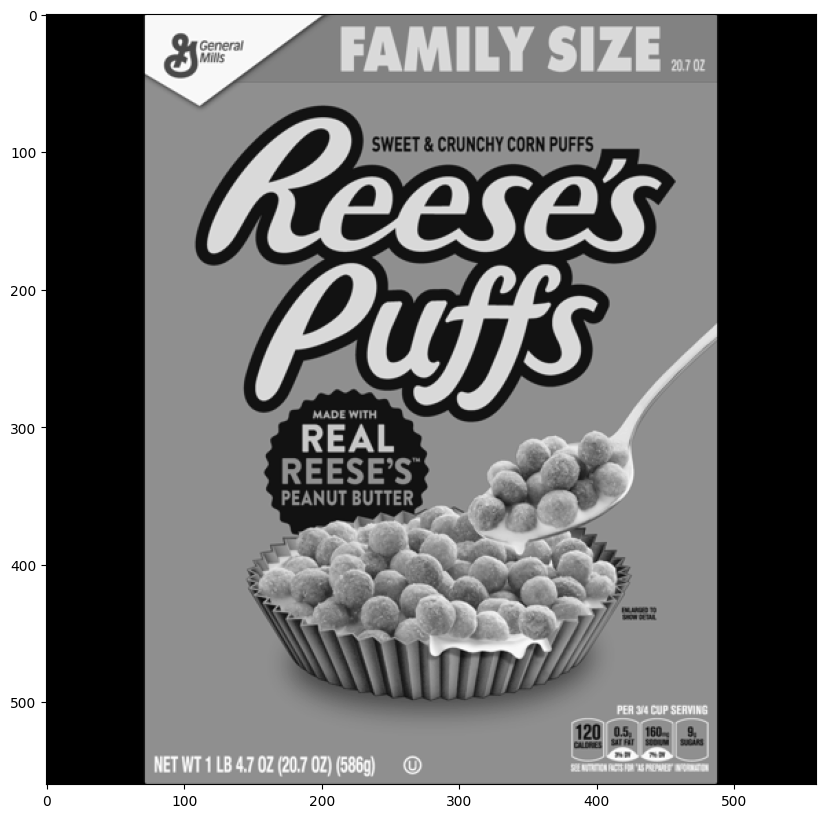

In [ ]:
reeses = cv.imread('/content/drive/MyDrive/pcvk/facedet/reeses_puffs.png',0)
display(reeses)

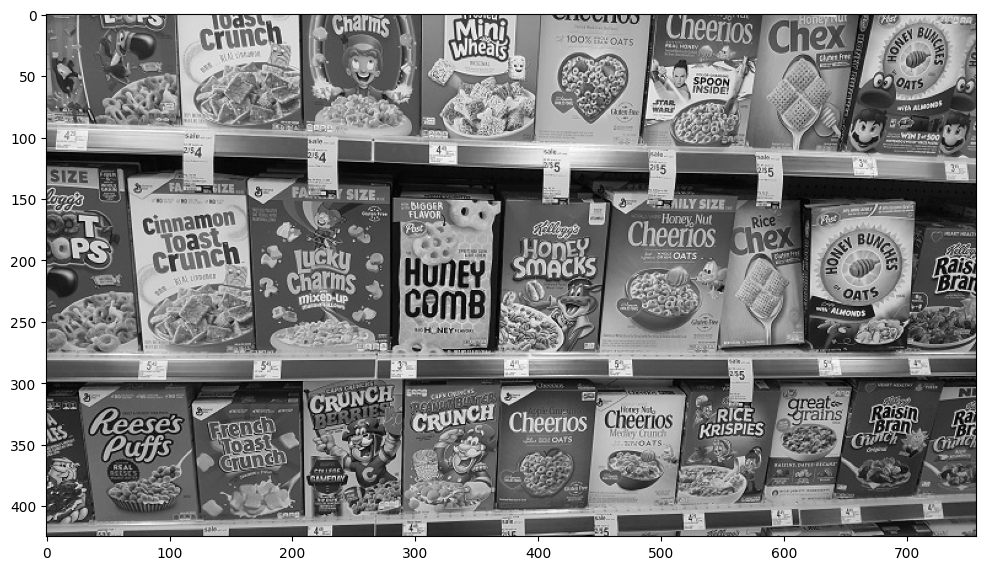

In [ ]:

cereals = cv.imread('/content/drive/MyDrive/pcvk/facedet/many_cereals.jpg',0)
display(cereals)


In [ ]:
orb = cv.ORB_create()
kp1,des1 = orb.detectAndCompute(reeses,None)
kp2,des2 = orb.detectAndCompute(cereals,None)
bf = cv.BFMatcher(cv.NORM_HAMMING,crossCheck = True)
matches = bf.match(des1,des2)
single_match = matches[0]
single_match.distance

71.0

In [ ]:
len(matches)

139

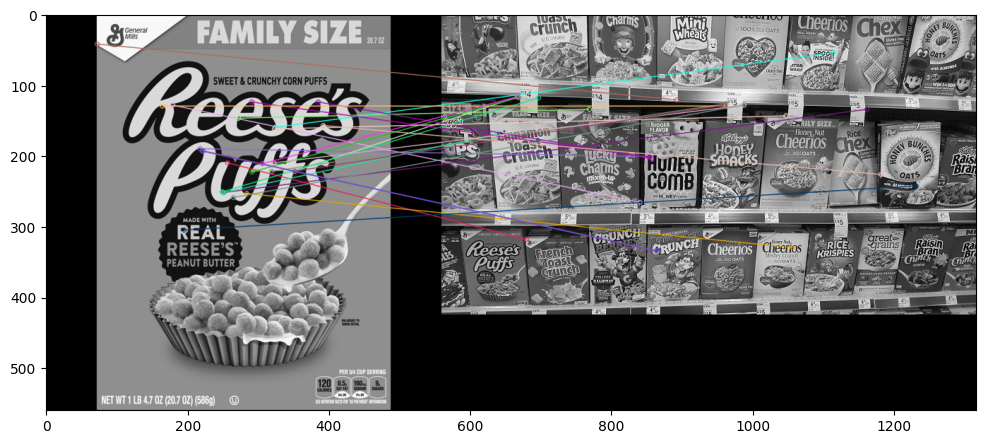

In [ ]:
matches = sorted(matches,key=lambda x:x.distance)
reeses_match = cv.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags=2)
display(reeses_match)

In [ ]:
sift = cv.xfeatures2d.SIFT_create()
kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals, None)
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)

good = []

#Makin kecil jarak makin cocok
#ratio match1 < 75% Match2
for match1,match2 in matches:
  #jika jarak match1 lebih kecil dari jarak 75% match2
  #descriptor disimpan
  if match1.distance < 0.75*match2.distance:
    good.append([match1])

len(good)

79

In [ ]:
len(matches)

1501

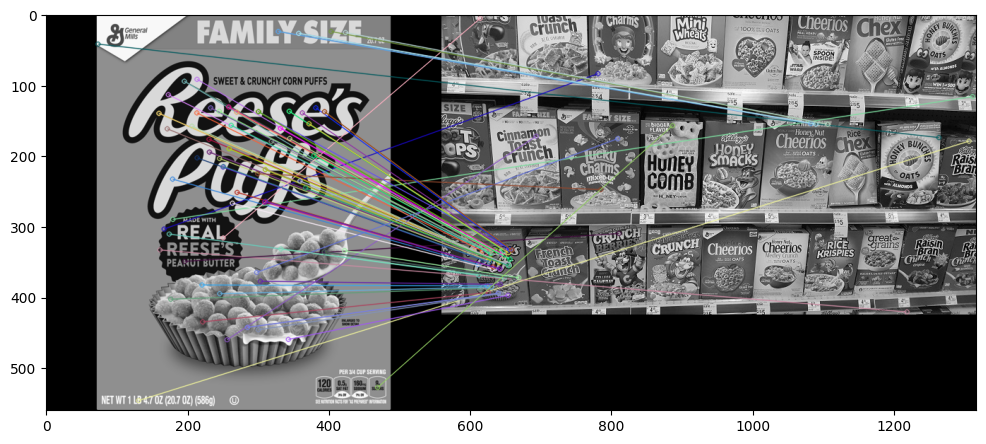

In [ ]:
sift_matches = cv.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)
display(sift_matches)

2. Lakukan Face Detection untuk image object lain yang tersedia pada (/images/facedet).
Tampilkan seperti pada contoh berikut.

In [ ]:
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/pcvk/harcascade/Salinan haarcascade_frontalface_alt.xml')


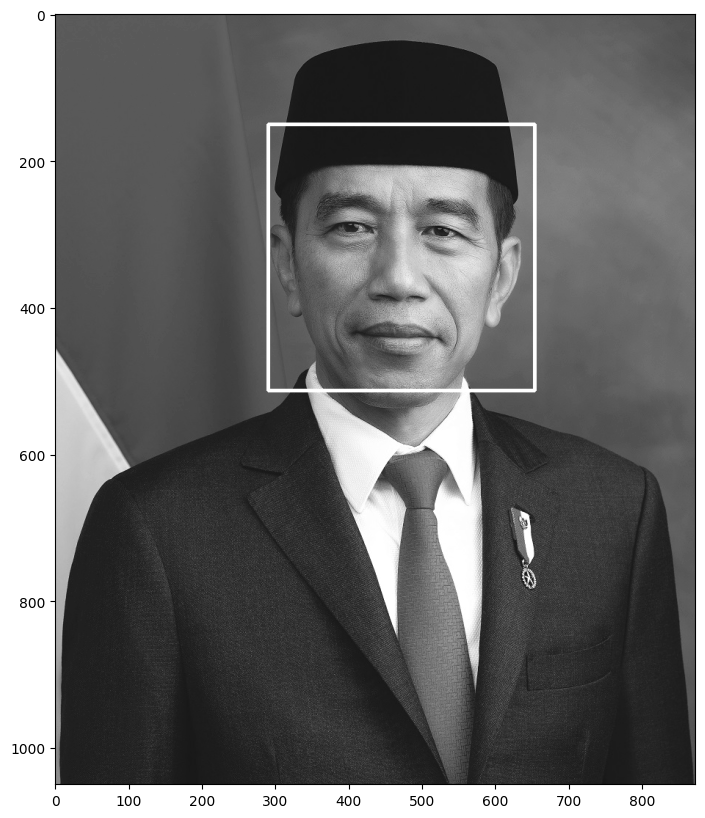

In [ ]:
jokowi = cv.imread('/content/drive/MyDrive/pcvk/facedet/jokowi.jpg',0)
roi_wajah = cascade_wajah.detectMultiScale(jokowi)
for(x,y,w,h) in roi_wajah:
  cv.rectangle(jokowi,(x,y),(x+w,y+h),(255,255,255),3)
plt.figure(figsize = (10,10))
plt.imshow(jokowi, cmap='gray')

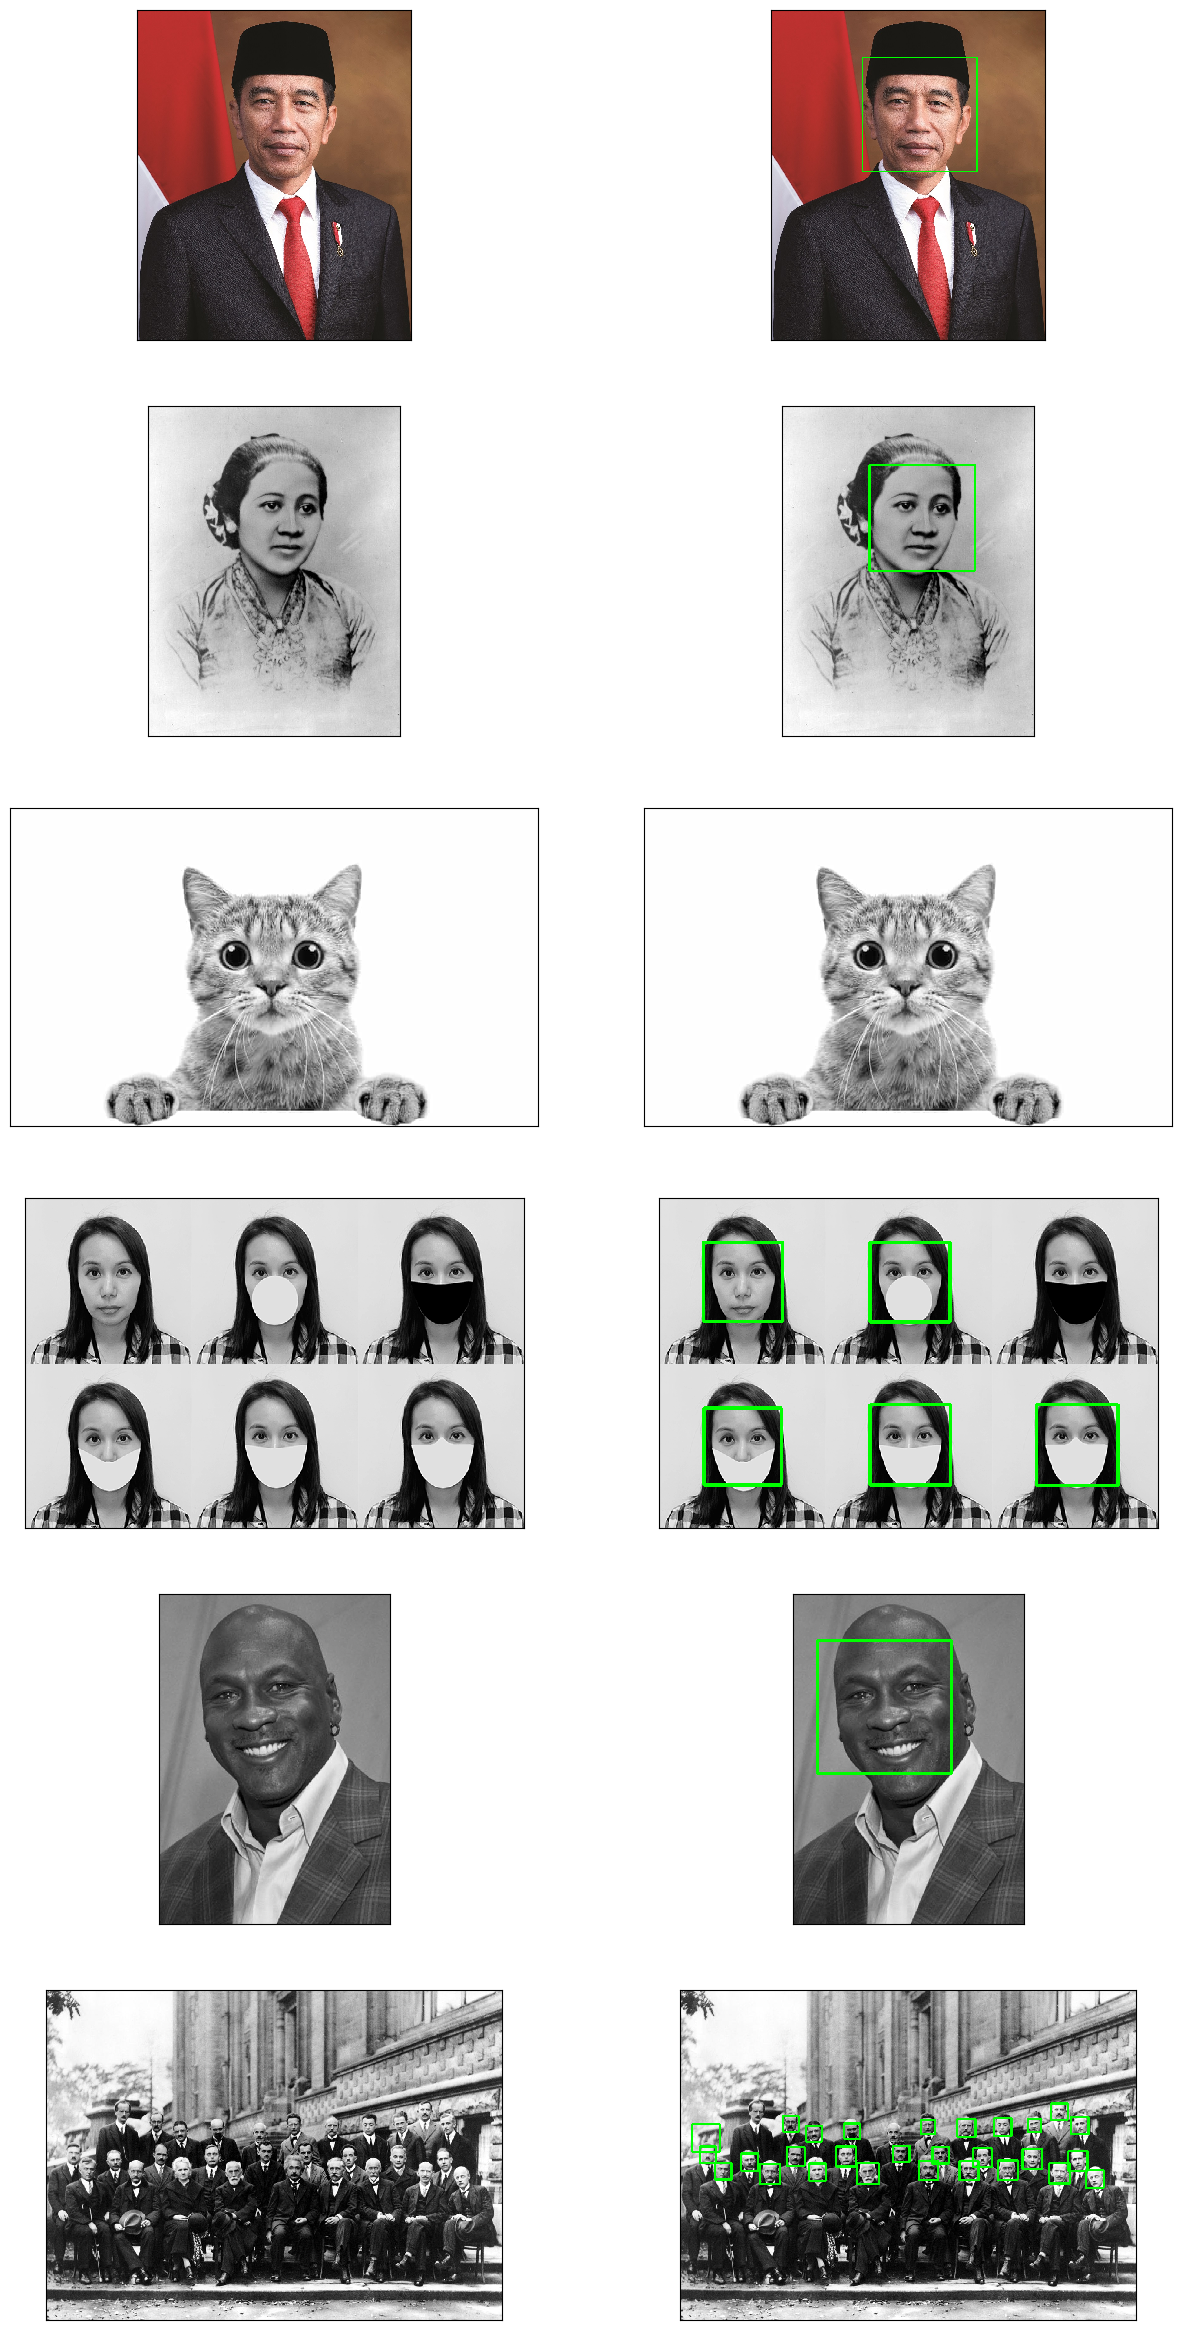

In [ ]:
def detek_wajah(img):
  img_asli = img.copy()
  img_wajah = cv.cvtColor(img_asli,cv.COLOR_RGB2GRAY)
  roi_wajah = cascade_wajah.detectMultiScale(img_wajah)
  for(x,y,w,h) in roi_wajah:
    cv.rectangle(img_asli,(x,y),(x+w,y+h),(0,255,0),3)
  return img_asli

jokowi = cv.imread('/content/drive/MyDrive/pcvk/facedet/jokowi.jpg')
kartini = cv.imread('/content/drive/MyDrive/pcvk/facedet/kartini.jpg',0)
kucing = cv.imread('/content/drive/MyDrive/pcvk/facedet/kucing.jpg',0)
mask = cv.imread('/content/drive/MyDrive/pcvk/facedet/mask.png',0)
mjordan = cv.imread('/content/drive/MyDrive/pcvk/facedet/mjordan.jpg',0)
solvay = cv.imread('/content/drive/MyDrive/pcvk/facedet/solvayconf.jpg',0)

jokowi = cv.cvtColor(jokowi,cv.COLOR_BGR2RGB)
kartini = cv.cvtColor(kartini,cv.COLOR_BGR2RGB)
kucing = cv.cvtColor(kucing,cv.COLOR_BGR2RGB)
mask = cv.cvtColor(mask,cv.COLOR_BGR2RGB)
mjordan = cv.cvtColor(mjordan,cv.COLOR_BGR2RGB)
solvay = cv.cvtColor(solvay,cv.COLOR_BGR2RGB)
hasil1 = detek_wajah(jokowi)
hasil2 = detek_wajah(kartini)
hasil3 = detek_wajah(kucing)
hasil4 = detek_wajah(mask)
hasil5 = detek_wajah(mjordan)
hasil6 = detek_wajah(solvay)

images = [jokowi, hasil1, kartini, hasil2, kucing, hasil3, mask, hasil4, mjordan, hasil5, solvay, hasil6]

plt.figure(figsize = (15,30))
for i in range(len(images)):
  plt.subplot(6,2,i+1),plt.imshow(images[i], interpolation='nearest')
  plt.xticks([]),plt.yticks([])
plt.show()

3. Pada Soal No.2. wajah kucing tidak bisa dideteksi dengan baik. Lakukan deteksi wajah
kucing hingga muncul rectangle pada bagian wajahnya. Petunjuk pada soal ini,
perhatikan pretrained features yang telah disediakan OpenCV. Gunakan xml yang ada
jika memang telah disediakan. Jika belum ada, coba cari dengan searching melalui
search engines.

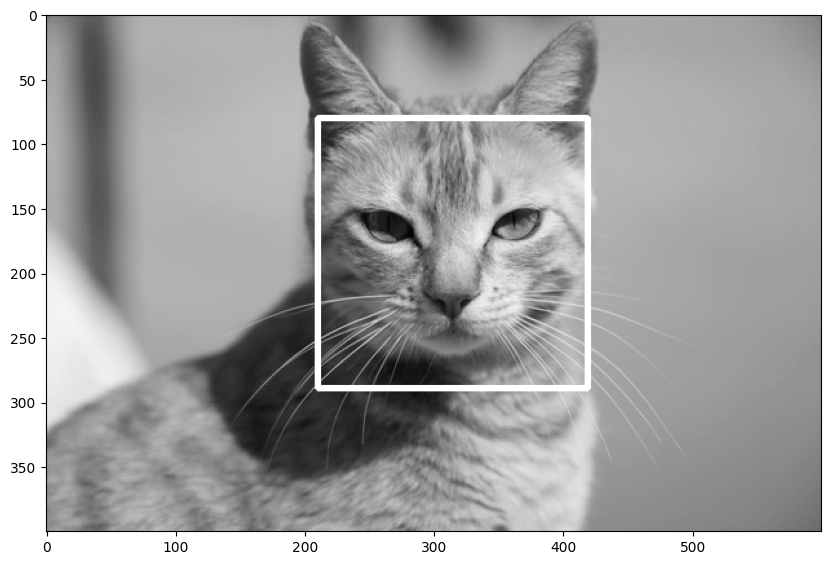

In [ ]:
cascade_kucing = cv.CascadeClassifier('/content/drive/MyDrive/pcvk/harcascade/Salinan haarcascade_frontalcatface.xml')

kucing=[]
kucing = cv.imread('/content/drive/MyDrive/pcvk/facedet/mycat.jpg',0)
roi_kucing = cascade_kucing.detectMultiScale(kucing)
for(x,y,w,h) in roi_kucing:
  cv.rectangle(kucing,(x,y),(x+w,y+h),(255,255,255),3)
plt.figure(figsize = (10,10))
plt.imshow(kucing, cmap='gray')

4. Cobakan juga untuk eyes detection.

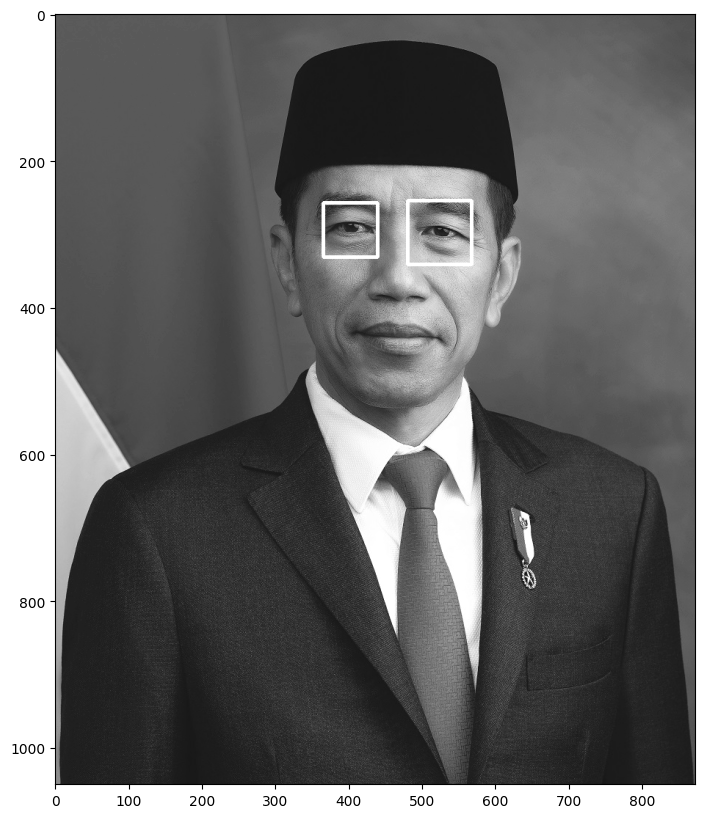

In [ ]:
cascade_mata = cv.CascadeClassifier('/content/drive/MyDrive/pcvk/harcascade/haarcascade_eye.xml')

jokowi=[]
jokowi = cv.imread('/content/drive/MyDrive/pcvk/facedet/jokowi.jpg',0)
roi_mata = cascade_mata.detectMultiScale(jokowi)
for(x,y,w,h) in roi_mata:
  cv.rectangle(jokowi,(x,y),(x+w,y+h),(255,255,255),3)
plt.figure(figsize = (10,10))
plt.imshow(jokowi, cmap='gray')

5. Lakukan Face Tracking menggunakan Google Colab. Petunjuk, Tutorial selengkapnya
tentang akses kamera dan FaceDetection pada google colab dapat dilihat di link
berikut: https://www.youtube.com/watch?v=YjWh7QvVH60

This notebook will go through how to access and run code on images and video taken using your webcam.

For this purpose of this tutorial we will be using OpenCV's Haar Cascade to do face detection on our Webcam image and video.

In [ ]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

Helper Functions
Below are a few helper function to make converting between different image data types and formats.

In [ ]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

Haar Cascade Classifier
For this tutorial we will run a simple object detection algorithm called Haar Cascade on our images and video fetched from our webcam. OpenCV has a pre-trained Haar Cascade face detection model.

In [ ]:
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

Webcam Images
Running code on images taken from webcam is fairly straight-forward. We will utilize code within Google Colab's Code Snippets that has a variety of useful code functions to perform various tasks.

We will be using the code snippet for Camera Capture to utilize your computer's webcam.

In [ ]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data)
  # grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv2.imwrite(filename, img)

  return filename

<IPython.core.display.Javascript object>

(480, 640)
Saved to photo.jpg


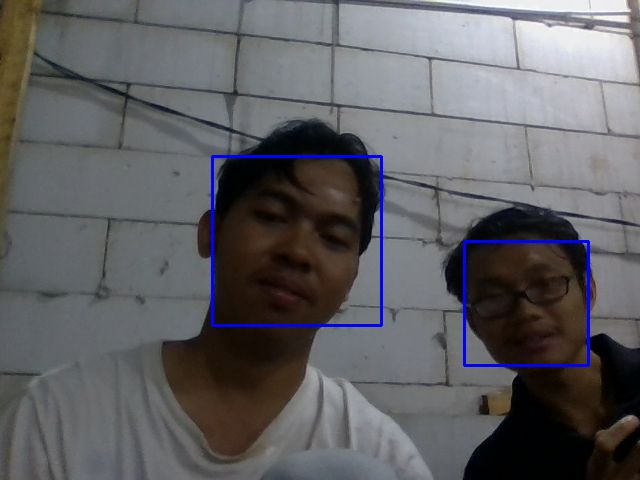

In [ ]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

Webcam Videos
Running code on webcam video is a little more complex than images. We need to start a video stream using our webcam as input. Then we run each frame through our progam (face detection) and create an overlay image that contains bounding box of detection(s). We then overlay the bounding box image back onto the next frame of our video stream.

In [ ]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [ ]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # grayscale image for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # get face region coordinates
    faces = face_cascade.detectMultiScale(gray)
    # get face bounding box for overlay
    for (x,y,w,h) in faces:
      bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

<IPython.core.display.Javascript object>

6. Lakukan Blurring pada bagian wajah yang terdeteksi. Berikut contoh keluarannya.
Petunjuk: anda dapat menggunakan cv.medianBlur untuk melakukan Blurring

Blurry Face

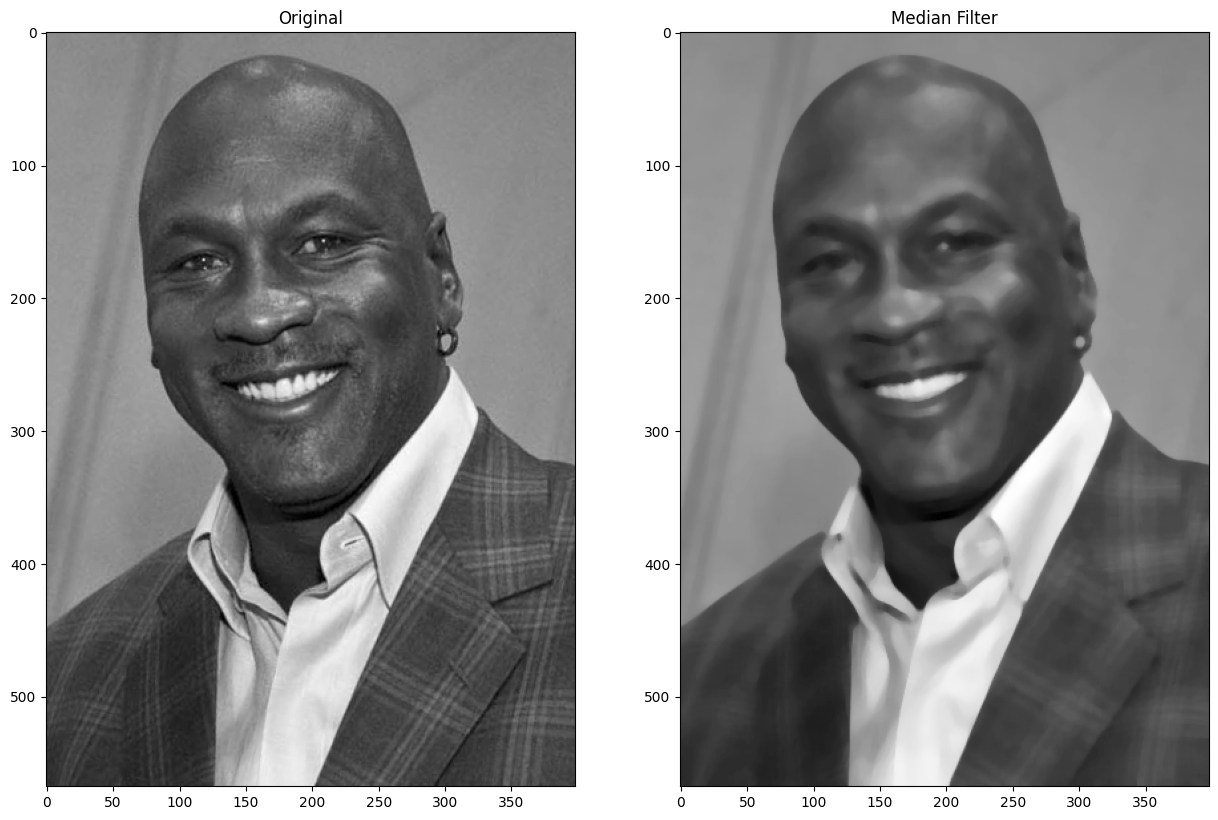

In [ ]:
mJordan = cv.imread('/content/drive/MyDrive/pcvk/facedet/mjordan.jpg')
mJordan_gray = cv.cvtColor(mJordan, cv.COLOR_BGR2GRAY)
figure_size = 9

output = cv.medianBlur(mJordan_gray, figure_size)
f, axarr = plt. subplots(1,2,figsize=(15,15))
plt.subplot(121), plt.imshow(mJordan_gray, cmap='gray'),plt.title('Original')
plt.subplot(122), plt.imshow(output, cmap='gray'),plt.title('Median Filter')
plt.show()

7. Lakukan segmentasi karakter pada KTP seperti gambar berikut

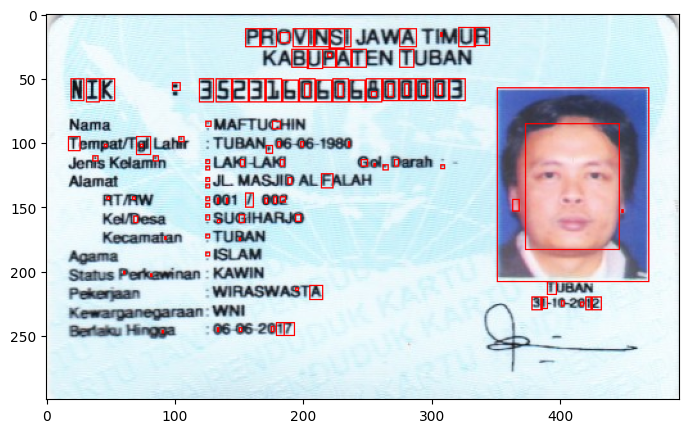

In [ ]:
import cv2

# Load the input image
ktp = cv2.imread('/content/drive/MyDrive/pcvk/week11/ktp3.png')

blurred = cv2.GaussianBlur(ktp, (5, 5), 0.5)

gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

erode = cv2.erode(bw.copy(), cv2.getStructuringElement(cv2.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv2.findContours(erode.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 4 and w >= 1 and float(ras) <= 1:
      cv2.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 2 and w >= 1 and float(ras) <= 1:
      cv2.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

plt.figure(figsize=(10,5))
plt.imshow(cv2.cvtColor(ktp, cv2.COLOR_BGR2RGB))


8. Lakukan cropping pada bagian NIK saja sehingga muncul hasil sebagai berikut

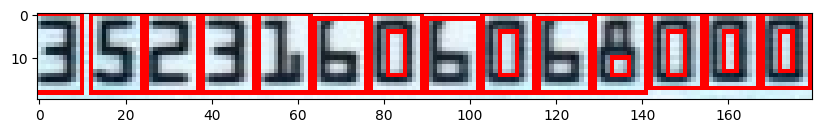

In [ ]:
# Load the input image
ktp = cv2.imread('/content/drive/MyDrive/pcvk/week11/ktp3.png')

blurred = cv2.GaussianBlur(ktp, (5, 5), 0.5)

gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

erode = cv2.erode(bw.copy(), cv2.getStructuringElement(cv2.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv2.findContours(erode.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 4 and w >= 1 and float(ras) <= 1:
      cv2.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 2 and w >= 1 and float(ras) <= 1:
      cv2.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

cropped_img = ktp[50:70, 120:300]

plt.figure(figsize=(10,5))
plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))

9. Kita akan menggunakan Deep Learning untuk melakukan pengenalan karakter
Sebelum melakukan training data, terlebih dahulu di siapkan data yang akan dilakukan
training yaitu data image nomor angka 0-9. Untuk membuat data tersebut bisa
gunakan image editor untuk dilakukan croping satu persatu. Kemudian selanjutnya
gunakan source code di bawah ini untuk proses persiapan untuk training.

In [5]:
# Load dataset MNIST
import tensorflow as tf # Import tensorflow for accessing keras

(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data() # Use tf.keras to access the mnist object

# Preprocessing data
X_train = X_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0  # Normalisasi [0, 1]
X_test = X_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

# Simpan dataset ke pickle
with open("X_train.pickle", "wb") as pickle_out:
    pickle.dump(X_train, pickle_out)
with open("Y_train.pickle", "wb") as pickle_out:
    pickle.dump(Y_train, pickle_out)
with open("X_test.pickle", "wb") as pickle_out:
    pickle.dump(X_test, pickle_out)
with open("Y_test.pickle", "wb") as pickle_out:
    pickle.dump(Y_test, pickle_out)

print("MNIST dataset telah diproses dan disimpan ke pickle!")

MNIST dataset telah diproses dan disimpan ke pickle!


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Model CNN
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation="relu"),
    Dense(10, activation="softmax")  # 10 output untuk digit 0-9
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(X_train, Y_train, epochs=10, validation_data=(X_test, Y_test))

test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 33ms/step - accuracy: 0.9154 - loss: 0.2809 - val_accuracy: 0.9812 - val_loss: 0.0570
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 34ms/step - accuracy: 0.9868 - loss: 0.0417 - val_accuracy: 0.9896 - val_loss: 0.0320
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 34ms/step - accuracy: 0.9910 - loss: 0.0271 - val_accuracy: 0.9896 - val_loss: 0.0329
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.9938 - loss: 0.0190 - val_accuracy: 0.9898 - val_loss: 0.0284
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 32ms/step - accuracy: 0.9957 - loss: 0.0127 - val_accuracy: 0.9921 - val_loss: 0.0267
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 33ms/step - accuracy: 0.9968 - loss: 0.0096 - val_accuracy: 0.9906 - val_loss: 0.0315
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 33ms/step - accuracy: 0.9969 - loss: 0.0087 - val_accuracy: 0.9910 - val_loss: 0.0366
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.9981 -

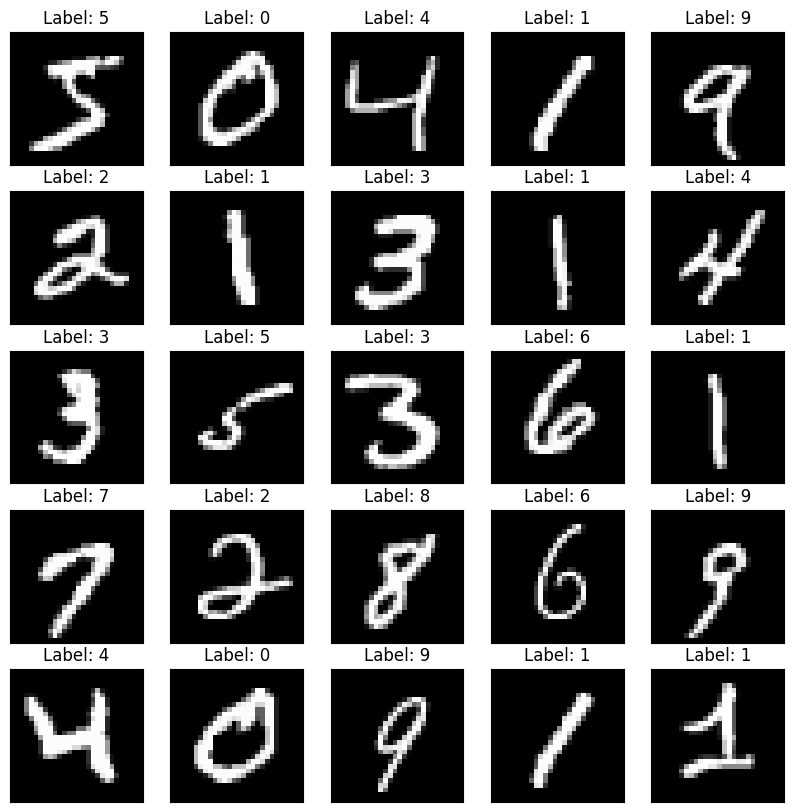

In [7]:
import matplotlib.pyplot as plt

# menampilkan beberapa gambar
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape(28, 28), cmap="gray")
    plt.title(f"Label: {Y_train[i]}")
plt.show()


Testing data

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Predicted label: 7


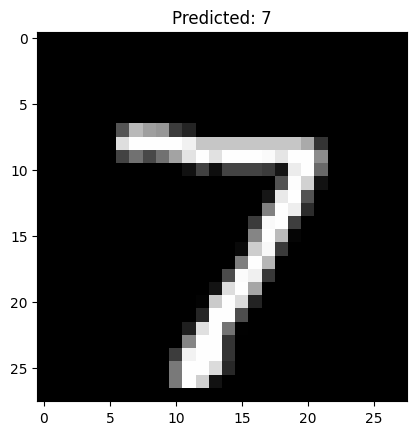

In [8]:
# Prediksi menggunakan data testing gambar pertama
predictions = model.predict(X_test[:1])
predicted_label = np.argmax(predictions)

print(f"Predicted label: {predicted_label}")
plt.imshow(X_test[0].reshape(28, 28), cmap="gray")
plt.title(f"Predicted: {predicted_label}")
plt.show()

In [11]:
!apt-get update
!apt-get install -y tesseract-ocr


Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,110 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,425 kB]
Get:13 http://security.ubuntu.com/ubuntu j

Tugas

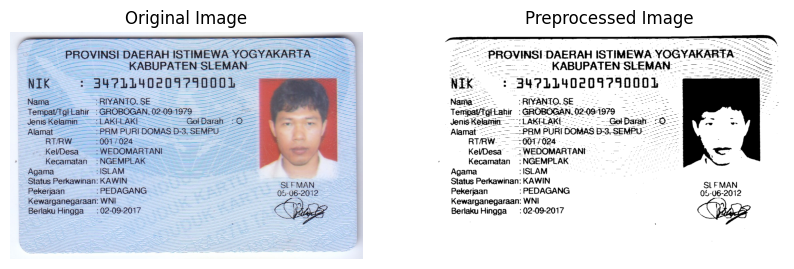

File: Salinan ktp.png, NIK: 3472140209790001


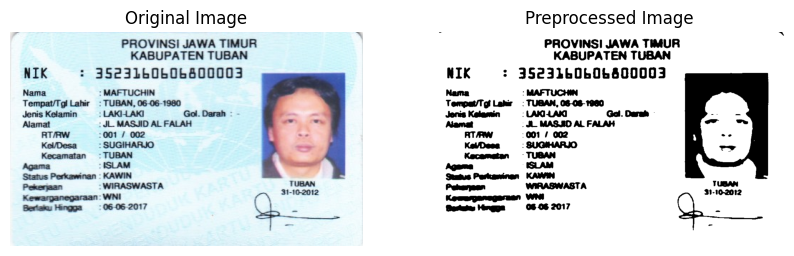

File: Salinan ktp4.png, NIK: 3523160606800003


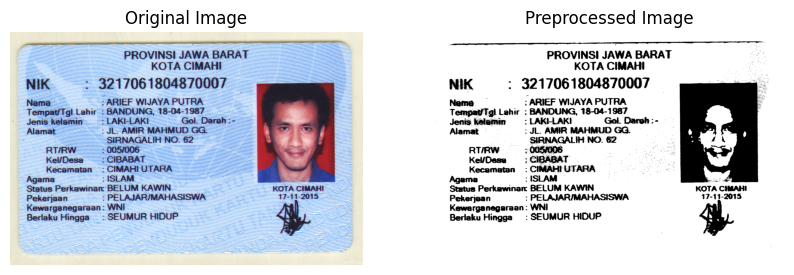

File: Salinan ktp2.png, NIK: 3217061804870007


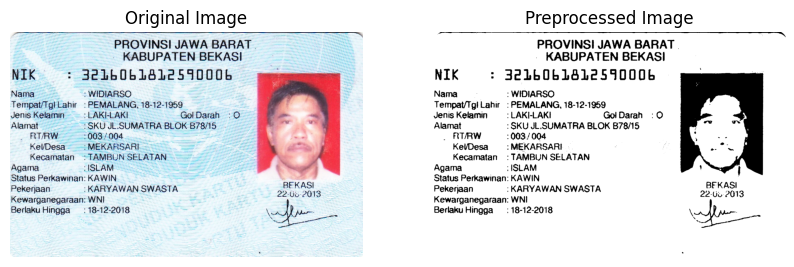

File: Salinan ktp6.png, NIK: 3216061812510001


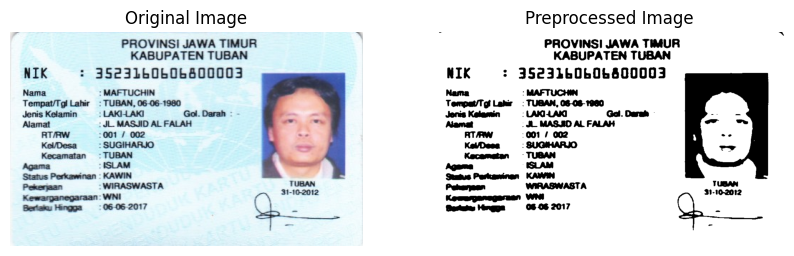

File: Salinan ktp3.png, NIK: 3523160606800003


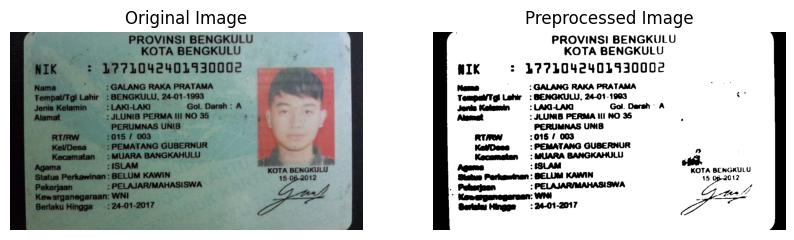

File: Salinan ktp1.png, NIK: 4771042401930002


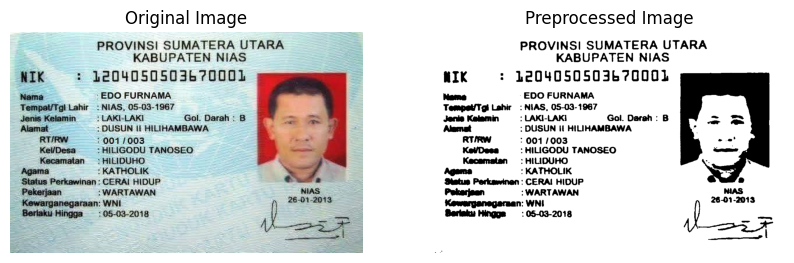

File: Salinan ktp5.png, NIK: 1204050503670001


In [12]:
!pip install pytesseract
import pytesseract
import cv2 as cv
import matplotlib.pyplot as plt
import re
import os
import numpy as np

directory_path = '/content/drive/MyDrive/pcvk/ktp_more'
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

def extract_nik_from_image(image_path):
    try:
        img = cv.imread(image_path)
        img_resized = cv.resize(img, None, fx=2, fy=2, interpolation=cv.INTER_CUBIC)

        # Preprocessing
        gray = cv.cvtColor(img_resized, cv.COLOR_BGR2GRAY)
        blurred_img = cv.GaussianBlur(gray, (5, 5), 0)
        ret, bw = cv.threshold(blurred_img, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

        plt.figure(figsize=(10,10))
        plt.subplot(1, 2, 1)
        plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
        plt.title("Original Image")
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(bw, cmap='gray')
        plt.title("Preprocessed Image")
        plt.axis('off')
        plt.show()

        # OCR menggunakan Tesseract
        text = pytesseract.image_to_string(bw, lang='eng', config='--psm 11 --oem 3')
        text = text.replace('O', '0').replace('I', '1') \
        .replace('i', '1').replace('L', '1').replace('l', '1') \
        .replace('b', '6').replace('S', '5').replace('c', '2') \
        .replace('J', '3').replace('E', '8').replace('e', '2')
        # print("Detected Text:", text)

        # Regex
        nik = re.search(r'\b\d{16,16}\b', text)
        if nik:
            return nik.group()
        else:
            return "NIK not found"
    except Exception as e:
        return f"Error processing image {image_path}: {e}"

for filename in os.listdir(directory_path):
    if filename.endswith(".png") or filename.endswith(".jpg"):
        file_path = os.path.join(directory_path, filename)
        nik = extract_nik_from_image(file_path)
        print(f"File: {filename}, NIK: {nik}")